CSCI480 - Applied Machine Learning

Assignment 1

Ben Hawks - z1849064




Imports, setup, etc.

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

Question 1

Text(0, 0.5, 'Worldwide Non-commercical space launches')

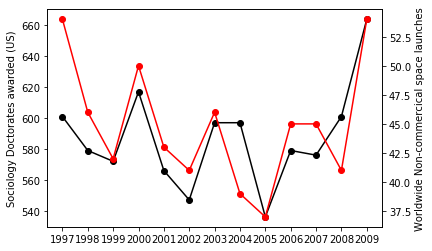

In [119]:
#data for question 1
years = np.array([1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009])
soc_docs = np.array([601,579,572,617,566,547,597,597,536,579,576,601,664])
space_launches = np.array([54,46,42,50,43,41,46,39,37,45,45,41,54])
#Question 1, reproducing chart
soc_ax = plt.gca()
line1 = soc_ax.plot(years,soc_docs,"ko-")
space_ax = soc_ax.twinx()
line2 = space_ax.plot(years,space_launches,"ro-")
space_ax.set_xticks(years)
soc_ax.set_ylabel("Sociology Doctorates awarded (US)")
space_ax.set_ylabel("Worldwide Non-commercical space launches")

Question 2


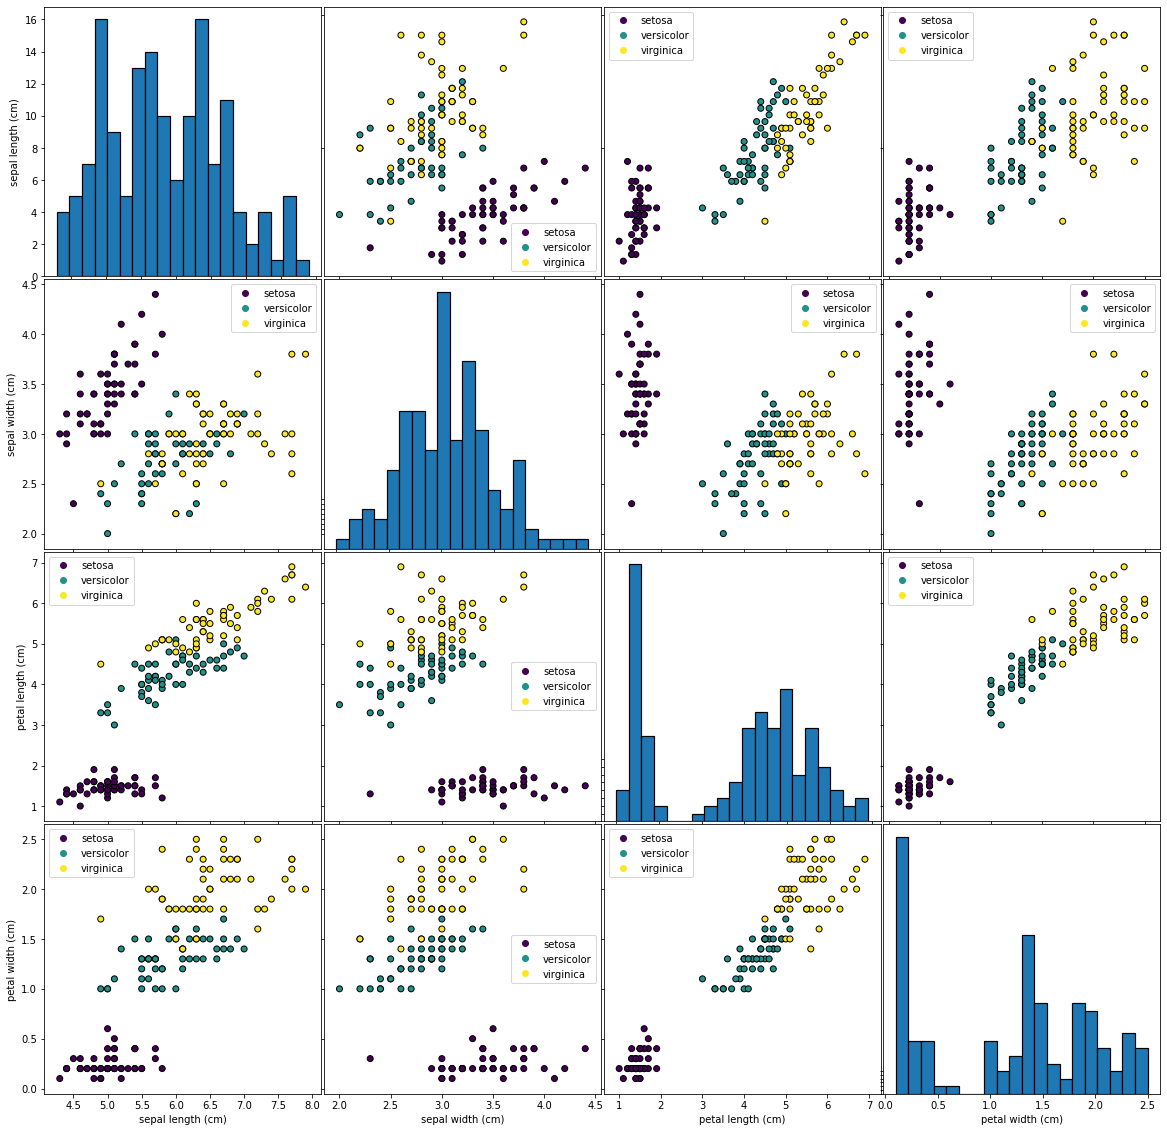

In [120]:
from sklearn import datasets
iris_data = datasets.load_iris()
iris_labels = iris_data.target_names.tolist() #convert to list for the sake of labels
#Setup our subplots, share x along rows and y along cols, with minimal spacing inbetween plots
figs, ax = plt.subplots(4,4,figsize=(20,20),sharex="col", sharey="row",gridspec_kw = {'wspace':0.01, 'hspace':0.01}) 

#iterate over data
for i in range(0,4):
  for j in range(0,4):
    if i == j: #Histograms
      #remove this plot from shared X/Y as to not screw up the other scatter plots
      ax[i,j].get_shared_x_axes().remove(ax[i,j])
      ax[i,j].get_shared_y_axes().remove(ax[i,j])
      #graph our histogram with the feature that corresponds to this row, 20 bins as an arbitrary number
      ax[i,j].hist(iris_data.data[:,i], bins=20, edgecolor='black', linewidth=1.2)
    else: #Scatterplots
      #x data is the column, y data is the row
      this_scatter = ax[i,j].scatter(iris_data.data[:,j],iris_data.data[:,i],c=iris_data.target,edgecolor='k')# plot our histograms
      ax[i,j].legend(handles=this_scatter.legend_elements()[0],labels=iris_labels)#handle the labling basically automatically
    if j == 0: #on the first plot of the row, put our Y Label
        ax[i,j].set_ylabel(iris_data.feature_names[i]) #
    if i == 3: #on the last row, set the x labels
        ax[i,j].set_xlabel(iris_data.feature_names[j])

Question 3

/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:960: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


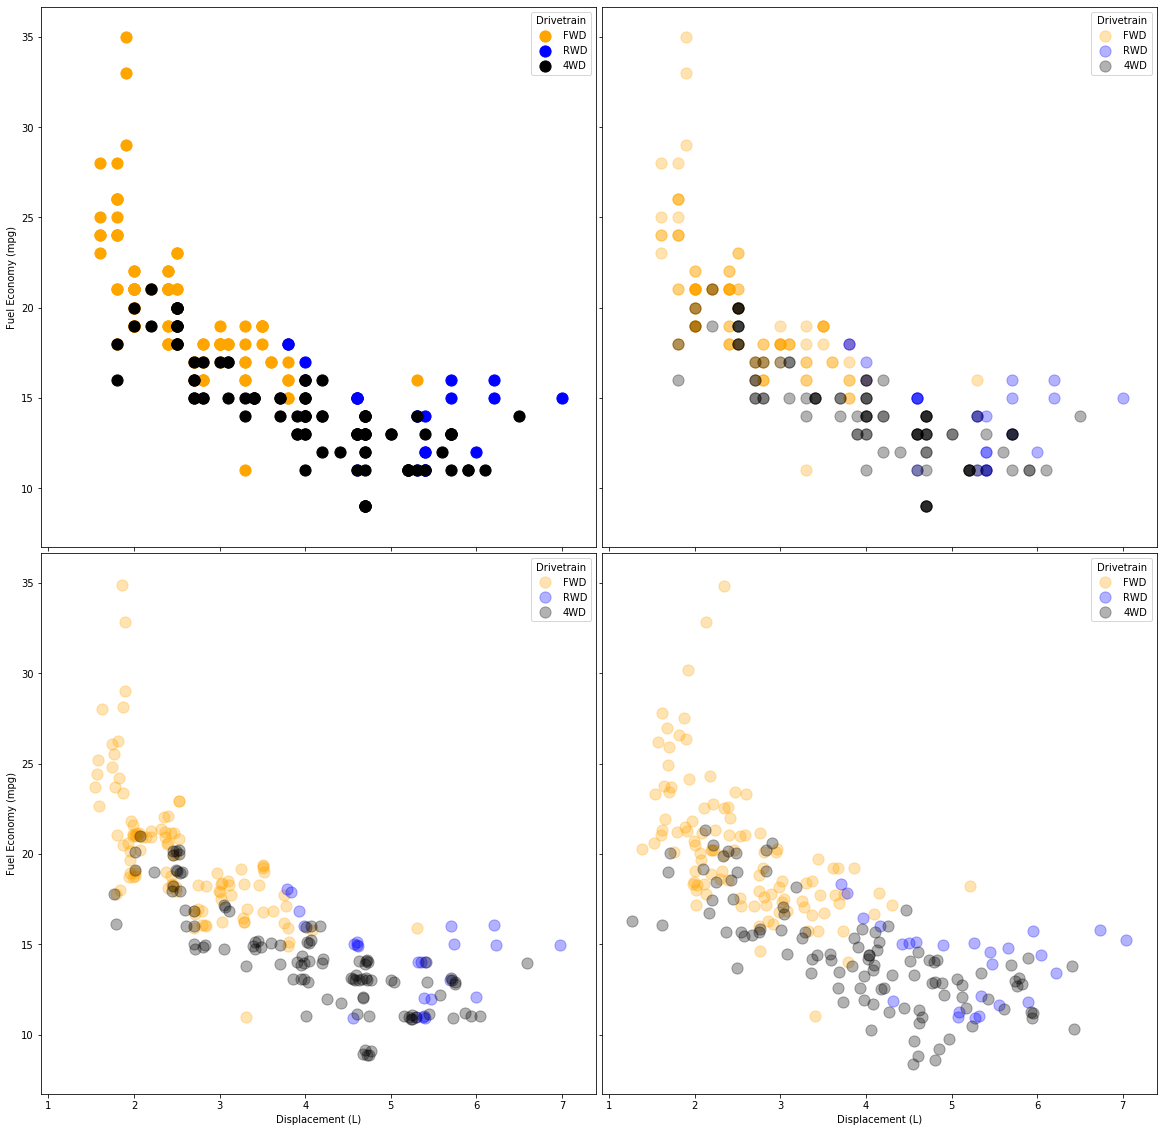

In [121]:
mpg_data = pd.read_csv('https://raw.githubusercontent.com/pratoolbharti/NIU/master/Applied_Machine_Learning_S20/Homework-1/mpg.csv') #read the target CSV into a pandas dataframe
figs, ax = plt.subplots(2,2,figsize=(20,20),sharex=True, sharey=True,gridspec_kw = {'wspace':0.01, 'hspace':0.01}) #create our plot/subplots
def rand_jitter(arr,mag): #jitter function, originally from stackoverflow.com/q/8671808/, modified to make the magnitude adjustable
    stdev = (0.01 + mag)*(max(arr)-min(arr))
    return arr + stdev * np.random.randn(len(arr))
for i in range(0,2):
  for j in range(0,2):
      colors = np.array(['orange', 'blue', 'black'])#Matplotlib seems to not like how these colors are handled, but I can't find any issues caused by it or a way to stop the error
      drv_labels ={"f":"FWD","r":"RWD","4":"4WD"} #labels for labeling each point in the scatter plot
      if ((i == 0) & (j == 0)): # apply alpha to everything but first plot
        alphaval = 1
      else:
        alphaval = 0.3
      for color, drv_target in zip(colors, ["f","r","4"]): #iterate over each dataset, selecting data by each drivetrain type, because this dataset doesn't have nice functions like the iris one did
        cty_mpg = mpg_data[mpg_data.drv == drv_target]["cty"]
        displ = mpg_data[mpg_data.drv == drv_target]["displ"]
        if i == 1: # Add jitter to the bottom row, making the last plot have much more jitter
          cty_mpg = rand_jitter(cty_mpg,j*0.05)
          displ = rand_jitter(displ,j*0.05)
        this_scatter = ax[i,j].scatter(displ,cty_mpg,c=color, label=drv_labels[drv_target],alpha=alphaval,s=125) # Plot our scatter plot 
        ax[i,j].legend(handles=this_scatter.legend_elements()[0],labels=["FWD","RWD","4WD"], title = "Drivetrain")#handle the labling basically automatically
      if j == 0: #on the first plot of the row, put our Y Label
        ax[i,j].set_ylabel("Fuel Economy (mpg)") #
      if i == 1: #on the last row, set the x labels
        ax[i,j].set_xlabel("Displacement (L)")
